In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from numpy import poly1d,polyfit  
from sklearn.model_selection import train_test_split
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import math
import statistics
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame

pygame 2.0.0 (SDL 2.0.12, python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
data = pd.read_csv('datos.csv')
data

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
76375,2020-10-28,Zimbabwe,NaN,8320,7845.0,242
76376,2020-10-29,Zimbabwe,NaN,8349,7864.0,242
76377,2020-10-30,Zimbabwe,NaN,8362,7884.0,242
76378,2020-10-31,Zimbabwe,NaN,8367,7894.0,243


In [5]:
#cargamos nuestro set de datos
data = pd.read_csv('datos.csv')
data = data[data['Country/Region'].isin(['Ecuador'])]
#y = list(df.iloc [:, 1]) # Numero de casos
#obtenemos datos de los casos confirmados
infectados = list(data.iloc[:, 3])
formatoFecha = '%Y-%m-%d'
fecha = data['Date']
data['Date'] = fecha.map(lambda x: (datetime.strptime(x, formatoFecha) - datetime.strptime('2020-01-22', formatoFecha)).days)
dias = list(data['Date'])
x = np.array(dias).reshape(-1, 1)
y = np.array(infectados).reshape(-1, 1)

<AxesSubplot:xlabel='Date'>

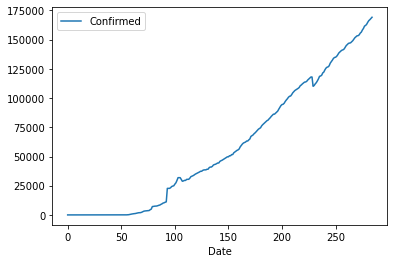

In [6]:
data.plot(x='Date', y='Confirmed')


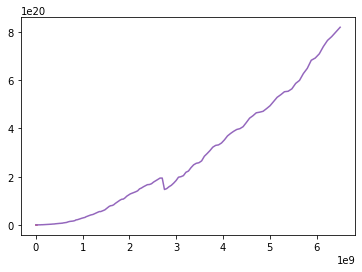

In [10]:
poly = PolynomialFeatures(degree=4)
x = np.array(dias).reshape(-1, 1)
y = np.array(infectados).reshape(-1, 1)
plt.plot(poly.fit_transform(x), poly.fit_transform(y), '-')